# Dimensionality Reduction: Feature Selection and Extraction

## Introduction

In data science and machine learning, dimensionality reduction techniques play a crucial role in dealing with high-dimensional data. Dimensionality reduction methods aim to reduce the number of features or variables while preserving the most relevant information. This notebook will explore two commonly used approaches: feature selection and feature extraction.

1. Feature Selection: Selecting a subset of the original features based on their importance.
2. Feature Extraction: Transforming the original features into a lower-dimensional space using linear or nonlinear techniques.

Throughout this notebook, we will demonstrate the implementation of various dimensionality reduction techniques using Python libraries such as scikit-learn and explain their concepts and usage.

## Table of Contents

1. Exploratory Data Analysis (EDA)
2. Feature Selection Techniques
   - Filter Methods
   - Wrapper Methods
   - Embedded Methods
3. Feature Extraction Techniques
   - Principal Component Analysis (PCA)
   - Linear Discriminant Analysis (LDA)
   - t-SNE (t-Distributed Stochastic Neighbor Embedding)
4. Implementation: Feature Selection Techniques
   - Chi-Squared Test
   - Recursive Feature Elimination (RFE)
5. Implementation: Feature Extraction Techniques
   - Principal Component Analysis (PCA)
   - Linear Discriminant Analysis (LDA)
   - t-SNE (t-Distributed Stochastic Neighbor Embedding)
6. Visualizing the Power of Dimensionality Reduction
7. Conclusion

## 1. Exploratory Data Analysis (EDA)

Before diving into dimensionality reduction, it is essential to understand the dataset and its characteristics. Exploratory Data Analysis (EDA) helps us gain insights into the data and identify patterns or correlations.

In this section, we will load the dataset, visualize feature distributions, and analyze relationships between variables.

### Libraries

In [ ]:
%pip install -r https://raw.githubusercontent.com/vrughetti/python4DS/main/requirements.txt

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_breast_cancer, make_classification

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

from sklearn.decomposition import PCA

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

from sklearn.manifold import TSNE

### Dataset

We will use the same dataset used in classification algorithms: [Breast Cancer Wisconsin (Diagnostic) Data Set](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)). The dataset contains 569 samples of malignant and benign tumor cells. This is a suitable dataset for feature selection and extraction since it contains 30 numeric features.

In [3]:
data = load_breast_cancer(as_frame=True) # load data in pandas format
df = data.frame
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


### Feature and Target Variables

In [4]:
X = df.drop('target', axis=1)
y = df['target']

## 2. Feature Selection Techniques

Feature selection aims to identify and select a subset of the most informative features from the original dataset. It helps to eliminate irrelevant, redundant, or noisy features, reducing computational complexity and improving model performance.

There are three main categories of feature selection methods:

### a. Filter Methods

Filter methods evaluate the relevance of each feature independently of the machine learning model. They rely on statistical measures or heuristics to rank or score the features based on their relationship with the target variable.

- Chi-Squared Test
- Information Gain
- Correlation Coefficient

### b. Wrapper Methods

Wrapper methods select features by evaluating subsets of features using a specific machine learning algorithm. They consider the feature selection process as a search problem, where different combinations of features are evaluated to find the optimal subset.

- Recursive Feature Elimination (RFE)
- Forward Selection
- Backward Elimination

### c. Embedded Methods

Embedded methods perform feature selection as part of the model training process. These methods incorporate feature selection within the algorithm, optimizing the feature subset during the training phase.

- L1 Regularization (Lasso)
- Tree-based Feature Importance
- Elastic Net Regression

## 3. Feature Extraction Techniques

Feature extraction aims to transform the original features into a lower-dimensional space by creating new features, known as components. These components capture the most significant variations or patterns in the data.

Feature extraction methods can be categorized as linear or nonlinear techniques:

### a. Principal Component Analysis (PCA)

PCA is a popular linear technique used to extract the most important features by projecting the data onto a new coordinate system. It identifies orthogonal axes (principal components) that maximize the variance in the data.

In this section, we will explore the step-by-step implementation of PCA and interpret the results.

### b. Linear Discriminant Analysis (LDA)

LDA is a dimensionality reduction technique commonly used for classification problems. It aims to maximize the class separability by projecting the data onto a lower-dimensional space while preserving class-related information.

We will apply LDA to our dataset and evaluate its impact on the classification task.

### c. t-SNE (t-Distributed Stochastic Neighbor Embedding)

t-SNE is a nonlinear dimensionality reduction technique particularly useful for visualizing high-dimensional data. It maps the data points from the original space to a lower-dimensional space, emphasizing the local similarities and preserving the clustering structure.

We will utilize t-SNE to visualize our dataset and gain insights into its structure.

## 4. Implementation: Feature Selection Techniques

In this section, we will demonstrate the implementation of feature selection techniques using Python libraries. We will focus on two popular methods: Chi-Squared Test and Recursive Feature Elimination (RFE).

### 4.1 Chi-Squared Test

The Chi-Squared Test is a statistical measure used to determine the independence between categorical variables. In feature selection, we can calculate the Chi-Squared statistic between each feature and the target variable and select the features with the highest scores.

Here's an example of how to perform feature selection using the Chi-Squared Test:

In [5]:
# Select the top 10 features based on Chi-Squared Test
k = 10
selector = SelectKBest(score_func=chi2, k=k)
selected_features = selector.fit_transform(X, y)

# Get the indices of the selected features
selected_indices = selector.get_support(indices=True)

# Get the names of the selected features
selected_feature_names = X.columns[selected_indices]
selected_feature_names

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'perimeter error', 'area error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area'],
      dtype='object')

### 4.2 Recursive Feature Elimination (RFE)

Recursive Feature Elimination (RFE) is a wrapper method that recursively selects features by training a machine learning model on the subset of features and eliminating the least important ones. It ranks the features based on their importance and selects the top-ranked features.

Let's see an example of implementing RFE for feature selection:

In [6]:
# Create a logistic regression model
model = LinearRegression()

# Select the top 10 features using RFE
k = 10
selector = RFE(estimator=model, n_features_to_select=k)
selected_features = selector.fit_transform(X, y)

# Get the support mask of selected features
selected_mask = selector.support_

# Get the names of the selected features
selected_feature_names = X.columns[selected_mask]
selected_feature_names

Index(['mean smoothness', 'mean concave points', 'mean fractal dimension',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'worst smoothness', 'worst symmetry',
       'worst fractal dimension'],
      dtype='object')

These are just two examples of feature selection techniques. You can explore more methods and adapt them based on your specific requirements and the nature of your dataset.

## 5. Implementation: Feature Extraction Techniques

In this section, we will demonstrate the implementation of feature extraction techniques using Python libraries. We will focus on three popular methods: Principal Component Analysis (PCA), Linear Discriminant Analysis (LDA), and t-SNE.



### 5.1 Principal Component Analysis (PCA)

PCA is a linear dimensionality reduction technique that aims to find the principal components that capture the maximum variance in the data. Here's an example of how to perform PCA:

In [7]:
# Create a PCA instance
pca = PCA(n_components=2)

# Fit and transform the data to the reduced dimensional space
reduced_features = pca.fit_transform(X)

# Access the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
explained_variance_ratio

array([0.98204467, 0.01617649])

### 5.2 Linear Discriminant Analysis (LDA)

LDA is a linear dimensionality reduction technique commonly used for classification problems. It aims to find a lower-dimensional space that maximizes class separability. Here's an example of how to apply LDA:

In [8]:
# Create an LDA instance
lda = LinearDiscriminantAnalysis(n_components=1)

# Fit and transform the data to the reduced dimensional space
reduced_features = lda.fit_transform(X, y)
reduced_features

array([[-3.32392717e+00],
       [-2.31910801e+00],
       [-3.74742484e+00],
       [-4.04854946e+00],
       [-2.28115767e+00],
       [-1.61150348e+00],
       [-2.35653128e+00],
       [-1.28122316e+00],
       [-1.60828074e+00],
       [-3.86266690e+00],
       [-8.64980964e-01],
       [-2.39981887e+00],
       [-1.32670638e+00],
       [-4.20145181e-01],
       [-1.25084871e+00],
       [-3.06625368e+00],
       [-2.11049829e+00],
       [-3.17780841e+00],
       [-3.43796946e+00],
       [ 2.23125867e-01],
       [ 1.97973275e+00],
       [ 2.46635453e+00],
       [-1.79100127e+00],
       [-3.02554197e+00],
       [-3.87178737e+00],
       [-3.99524140e+00],
       [-2.74537482e+00],
       [-2.57652189e+00],
       [-3.07566630e+00],
       [-8.02258881e-01],
       [-3.41613522e+00],
       [-2.67943316e+00],
       [-3.63987363e+00],
       [-3.07550539e+00],
       [-2.68840028e+00],
       [-2.57312945e+00],
       [-1.07380321e+00],
       [ 1.87492316e+00],
       [ 4.9

### 5.3 t-SNE (t-Distributed Stochastic Neighbor Embedding)

t-SNE is a nonlinear dimensionality reduction technique that is particularly useful for visualizing high-dimensional data. It maps the data points from the original space to a lower-dimensional space, emphasizing the local similarities and preserving the clustering structure. Here's an example of using t-SNE:

In [9]:
# Create a t-SNE instance
tsne = TSNE(n_components=2)

# Fit and transform the data to the reduced dimensional space
reduced_features = tsne.fit_transform(X)
reduced_features

array([[ 42.104282 , -12.535738 ],
       [ 42.26981  ,  -9.85052  ],
       [ 37.6618   ,  -9.86557  ],
       ...,
       [ 22.16412  ,  -2.7382157],
       [ 40.147724 ,  -9.924445 ],
       [-38.263714 , -25.200678 ]], dtype=float32)

These examples provide a starting point for implementing feature extraction techniques. You can experiment with different parameters and explore additional options offered by the respective libraries.

## 6. Visualizing the Power of Dimensionality Reduction

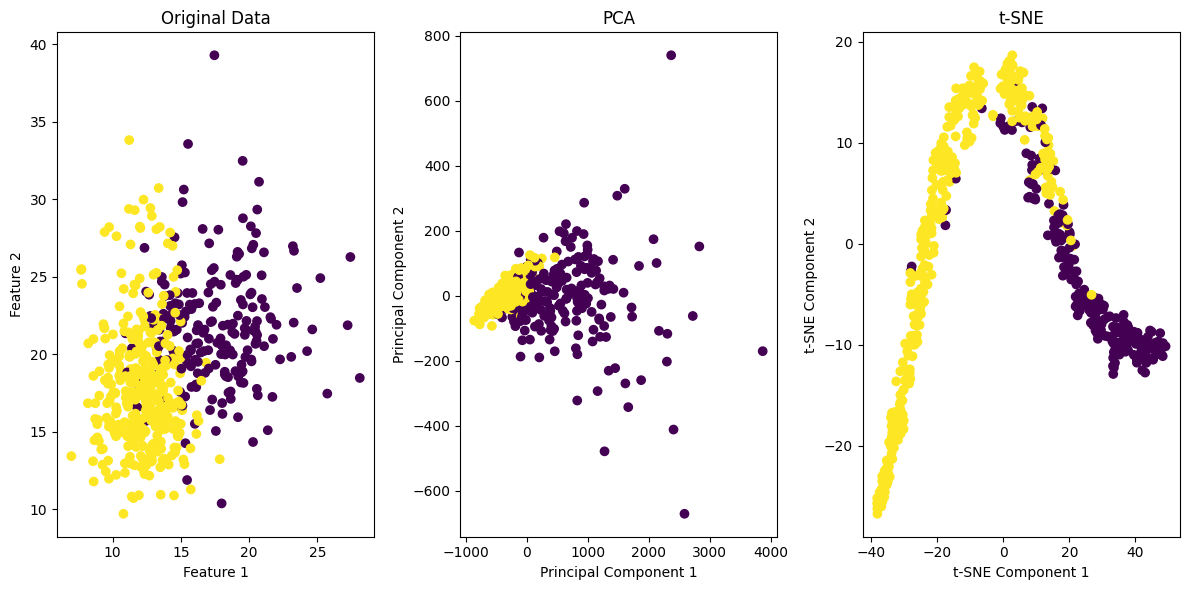

In [11]:
# Apply dimensionality reduction techniques
pca = PCA(n_components=2)
tsne = TSNE(n_components=2)

# Perform dimensionality reduction
pca_features = pca.fit_transform(X)
tsne_features = tsne.fit_transform(X)

# Plot the original data
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, cmap='viridis')
plt.title("Original Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

# Plot the data after PCA
plt.subplot(1, 3, 2)
plt.scatter(pca_features[:, 0], pca_features[:, 1], c=y, cmap='viridis')
plt.title("PCA")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")

# Plot the data after t-SNE
plt.subplot(1, 3, 3)
plt.scatter(tsne_features[:, 0], tsne_features[:, 1], c=y, cmap='viridis')
plt.title("t-SNE")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")

plt.tight_layout()
plt.show()

In this example, we generate a synthetic dataset with 1000 samples and 100 features. We then apply PCA and t-SNE to reduce the dimensionality to 2 for visualization purposes.

The resulting plots show the data distribution before and after applying dimensionality reduction. The original data plot displays the data points in the original feature space, while the PCA and t-SNE plots show the data points transformed into a lower-dimensional space.

You will notice that after applying dimensionality reduction techniques, the data points are more spread out and visually separable. This reduction in dimensionality helps uncover underlying patterns and structures that may have been difficult to observe in the original high-dimensional space.

These visualizations demonstrate the power of dimensionality reduction in simplifying complex datasets and revealing important relationships or clusters in the data.

## 7. Conclusion

Dimensionality reduction is a fundamental technique in data science and machine learning. In this notebook, we explored feature selection and feature extraction methods to reduce the dimensionality of datasets.

Feature selection techniques, such as the Chi-Squared Test and Recursive Feature Elimination (RFE), help identify the most relevant features for the task at hand. On the other hand, feature extraction techniques, including PCA, LDA, and t-SNE, transform the original features into a lower-dimensional space, capturing the most important patterns or variations in the data.

By employing these dimensionality reduction techniques, you can enhance model performance, reduce computational complexity, and gain valuable insights from high-dimensional datasets.

---

# What's Next?

Next notebook: [Graphs and Networks Analysis](https://github.com/vrughetti/python4DS/blob/main/notebooks/graph_networks/graph_networks.ipynb)